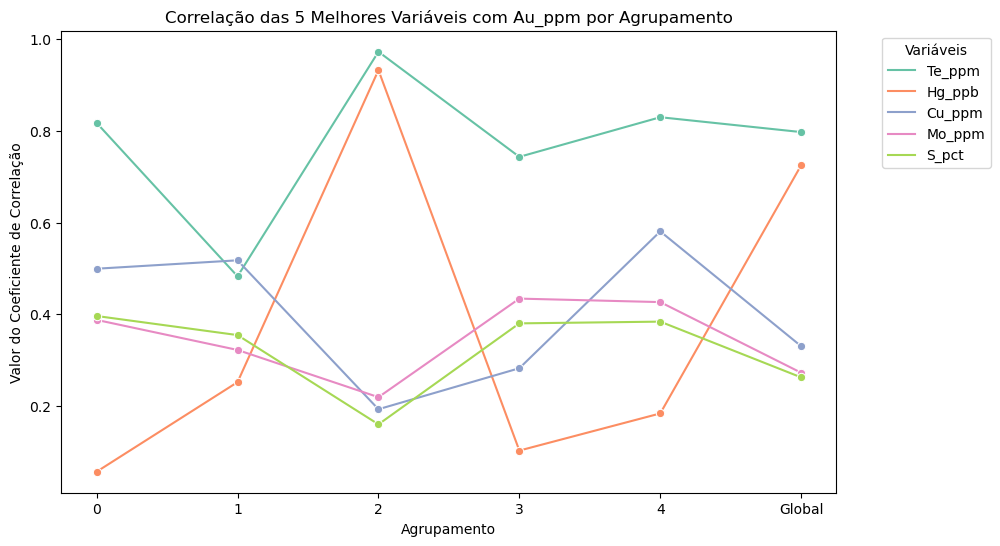

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
file_path = r'D:\python\hochschild\COMPOSITE_2_5_NORMALIZADO_with_clusters_Iso_sample.csv'
data = pd.read_csv(file_path)

# Transformar a coluna do agrupamento em tipo string
data['Double_Space_Labels'] = data['Double_Space_Labels'].astype(str)

# Calcular a correlação de todas as colunas com Au_ppm
correlations = data.corr()['Au_ppm'].sort_values(ascending=False)

# Selecionar as 5 melhores correlações positivas (excluindo a própria coluna Au_ppm)
top_5_correlations = correlations[1:6]

# Criar um DataFrame para armazenar as correlações por agrupamento
group_correlations = pd.DataFrame()

# Calcular a correlação de cada coluna com Au_ppm por agrupamento
for column in top_5_correlations.index:
    group_correlations[column] = data.groupby('Double_Space_Labels')[column].corr(data['Au_ppm'])

# Transformar os índices em variáveis categóricas
group_correlations = group_correlations.reset_index()

# Adicionar a correlação global ao DataFrame
global_correlations = pd.DataFrame(top_5_correlations).T
global_correlations['Double_Space_Labels'] = 'Global'
group_correlations = pd.concat([group_correlations, global_correlations], ignore_index=True)

# Definir uma paleta de cores personalizada
custom_palette = sns.color_palette("Set2", len(top_5_correlations))

# Plotar o gráfico de linhas suavizadas com cores personalizadas
plt.figure(figsize=(10, 6))
sns.lineplot(data=group_correlations.melt(id_vars='Double_Space_Labels', var_name='Variável', value_name='Correlação'), 
             x='Double_Space_Labels', y='Correlação', hue='Variável', marker='o', palette=custom_palette)
plt.title('Correlação das 5 Melhores Variáveis com Au_ppm por Agrupamento')
plt.xlabel('Agrupamento')
plt.ylabel('Valor do Coeficiente de Correlação')
plt.legend(title='Variáveis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


